## Importing Required Packages

In [2]:
import numpy as np
import pandas as pd

## Loading dataset file

In [3]:
data = pd.read_csv('./dataset/HistoricalProductDemand.csv')

In [4]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [6]:
data['Product_Code'].nunique()

2160

In [7]:
data.nunique()

Product_Code        2160
Warehouse              4
Product_Category      33
Date                1729
Order_Demand        3828
dtype: int64

In [8]:
data['Warehouse'].unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

## Spliting data column into year, month and day columns

In [9]:
data[['Year', 'Month', 'Day']] = data['Date'].str.split('/', expand=True)


In [10]:
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,2012/7/27,100,2012,7,27
1,Product_0979,Whse_J,Category_028,2012/1/19,500,2012,1,19
2,Product_0979,Whse_J,Category_028,2012/2/3,500,2012,2,3
3,Product_0979,Whse_J,Category_028,2012/2/9,500,2012,2,9
4,Product_0979,Whse_J,Category_028,2012/3/2,500,2012,3,2
...,...,...,...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000,2016,4,27
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1,2016,4,27
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500,2016,4,28
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50,2016,10,7


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
 5   Year              1037336 non-null  object
 6   Month             1037336 non-null  object
 7   Day               1037336 non-null  object
dtypes: object(8)
memory usage: 64.0+ MB


In [12]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,2012/7/27,100,2012,7,27
1,Product_0979,Whse_J,Category_028,2012/1/19,500,2012,1,19
2,Product_0979,Whse_J,Category_028,2012/2/3,500,2012,2,3
3,Product_0979,Whse_J,Category_028,2012/2/9,500,2012,2,9
4,Product_0979,Whse_J,Category_028,2012/3/2,500,2012,3,2


## Removing unwanted formats of data

In [13]:
data['Order_Demand'] = data['Order_Demand'].str.replace(r'\D', '', regex=True).astype(int)

In [14]:
data['Year'] = data['Year'].astype(float)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'] = data['Year'].fillna(0).astype(int)

In [15]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,2012/7/27,100,2012,7,27
1,Product_0979,Whse_J,Category_028,2012/1/19,500,2012,1,19
2,Product_0979,Whse_J,Category_028,2012/2/3,500,2012,2,3
3,Product_0979,Whse_J,Category_028,2012/2/9,500,2012,2,9
4,Product_0979,Whse_J,Category_028,2012/3/2,500,2012,3,2


In [16]:
data['Month'] = data['Month'].astype(float)
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['Month'] = data['Month'].fillna(0).astype(int)

In [17]:
data['Day'] = data['Day'].astype(float)
data['Day'] = pd.to_numeric(data['Day'], errors='coerce')
data['Day'] = data['Day'].fillna(0).astype(int)

## Creating a copy of main data and dropping the date column

In [18]:
df = pd.DataFrame()
df = data

In [19]:
df = df.drop(columns = ['Date'])

In [20]:
df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,100,2012,7,27
1,Product_0979,Whse_J,Category_028,500,2012,1,19
2,Product_0979,Whse_J,Category_028,500,2012,2,3
3,Product_0979,Whse_J,Category_028,500,2012,2,9
4,Product_0979,Whse_J,Category_028,500,2012,3,2


## Performing data visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year', ylabel='count'>

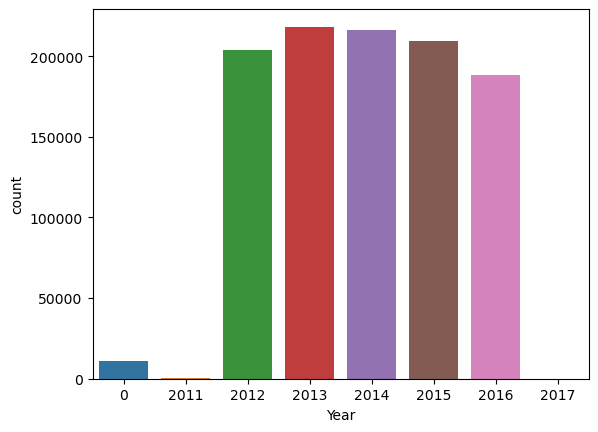

In [22]:
sns.countplot(df, x="Year")

<Axes: xlabel='Month', ylabel='count'>

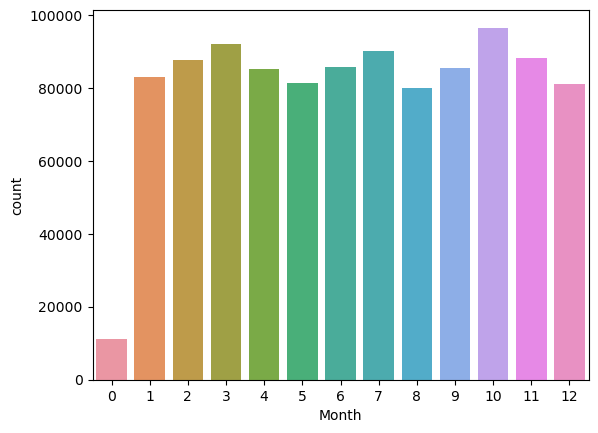

In [46]:
sns.countplot(df, x="Month")

<Axes: xlabel='Warehouse', ylabel='count'>

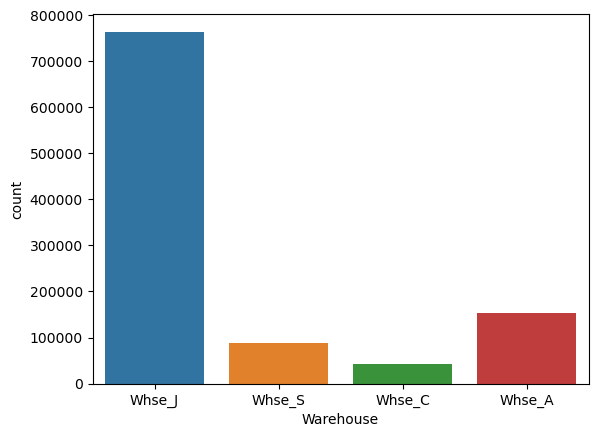

In [47]:
sns.countplot(df, x="Warehouse")

<Axes: xlabel='Month', ylabel='Order_Demand'>

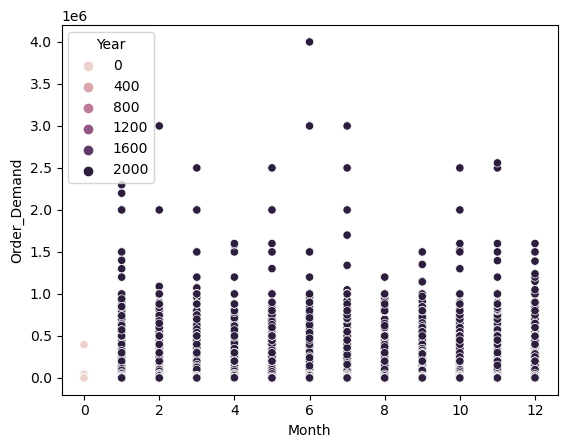

In [51]:
sns.scatterplot(data=df, x="Month", y="Order_Demand", hue="Year")

In [52]:
df['Year'].unique()

array([2012, 2011, 2013,    0, 2014, 2015, 2016, 2017])

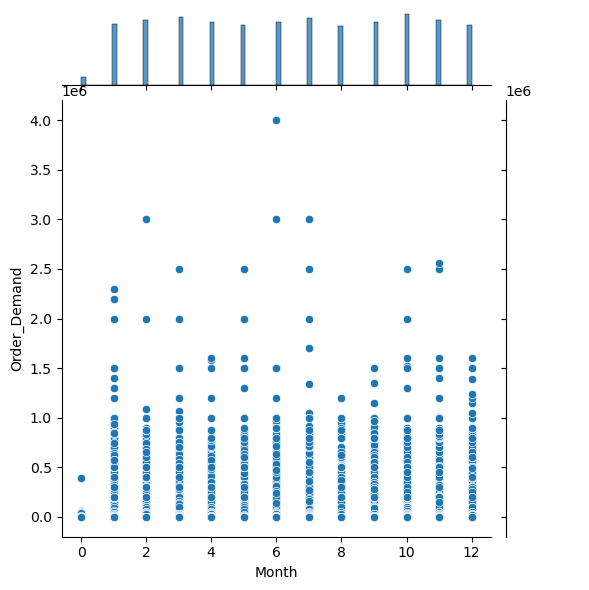

In [54]:
sns.jointplot(data=df, x="Month", y="Order_Demand")

## Convert categorical columns into numerical columns

In [23]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

In [24]:
df['Warehouse'] = label_encoder.fit_transform(df['Warehouse'])

In [25]:
df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,Product_0993,2,Category_028,100,2012,7,27
1,Product_0979,2,Category_028,500,2012,1,19
2,Product_0979,2,Category_028,500,2012,2,3
3,Product_0979,2,Category_028,500,2012,2,9
4,Product_0979,2,Category_028,500,2012,3,2


In [26]:
df['Product_Category'].unique()

array(['Category_028', 'Category_006', 'Category_001', 'Category_019',
       'Category_005', 'Category_030', 'Category_032', 'Category_011',
       'Category_033', 'Category_007', 'Category_015', 'Category_021',
       'Category_024', 'Category_026', 'Category_023', 'Category_022',
       'Category_009', 'Category_003', 'Category_004', 'Category_018',
       'Category_020', 'Category_013', 'Category_008', 'Category_017',
       'Category_031', 'Category_025', 'Category_010', 'Category_029',
       'Category_012', 'Category_002', 'Category_014', 'Category_027',
       'Category_016'], dtype=object)

In [27]:
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])

In [28]:
df['Product_Code'].unique()

array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0237', 'Product_0644', 'Product_0853'], dtype=object)

In [29]:
df['Product_Code'].nunique()

2160

In [30]:
df['Product_Code'] = label_encoder.fit_transform(df['Product_Code'])

In [31]:
df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,982,2,27,100,2012,7,27
1,968,2,27,500,2012,1,19
2,968,2,27,500,2012,2,3
3,968,2,27,500,2012,2,9
4,968,2,27,500,2012,3,2


In [32]:
df.corr()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
Product_Code,1.000000,-0.027311,0.147493,0.030940,-0.051333,-0.001819,-0.007451
Warehouse,-0.027311,1.000000,-0.097540,0.058026,0.226248,0.029700,0.035627
Product_Category,0.147493,-0.097540,1.000000,0.053335,-0.056042,-0.006009,-0.011295
Order_Demand,0.030940,0.058026,0.053335,1.000000,0.014139,0.002072,0.000586
Year,-0.051333,0.226248,-0.056042,0.014139,1.000000,0.191816,0.180171
Month,-0.001819,0.029700,-0.006009,0.002072,0.191816,1.000000,0.001040
Day,-0.007451,0.035627,-0.011295,0.000586,0.180171,0.001040,1.000000


In [33]:
df = df.drop(columns = ["Day"])

In [34]:
df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month
0,982,2,27,100,2012,7
1,968,2,27,500,2012,1
2,968,2,27,500,2012,2
3,968,2,27,500,2012,2
4,968,2,27,500,2012,3


In [35]:
x = df.drop(columns = ["Order_Demand"])

In [36]:
y = df["Order_Demand"]

In [37]:
x.head()

,Product_Code,Warehouse,Product_Category,Year,Month
0,982,2,27,2012,7
1,968,2,27,2012,1
2,968,2,27,2012,2
3,968,2,27,2012,2
4,968,2,27,2012,3


In [38]:
y.head()

0    100
1    500
2    500
3    500
4    500
Name: Order_Demand, dtype: int32

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)

In [42]:
scaled_df = pd.DataFrame(scaled_df)

In [43]:
scaled_df

,0,1,2,3,4
0,-0.224733,0.309509,1.651233,0.094630,0.160928
1,-0.249314,0.309509,1.651233,0.094630,-1.557041
2,-0.249314,0.309509,1.651233,0.094630,-1.270713
3,-0.249314,0.309509,1.651233,0.094630,-1.270713
4,-0.249314,0.309509,1.651233,0.094630,-0.984385
...,...,...,...,...,...
1048570,1.176393,0.309509,-1.128312,0.113918,-0.698057
1048571,1.495948,0.309509,-1.128312,0.113918,-0.698057
1048572,1.169370,0.309509,-1.128312,0.113918,-0.698057
1048573,-0.386266,0.309509,1.019518,0.113918,1.019913


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)